In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
match=pd.read_csv('matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
delivery=pd.read_csv('deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
print("match shape->",match.shape,"deliveries shape->",delivery.shape)

match shape-> (636, 18) deliveries shape-> (150460, 21)


In [8]:
print("match column names->",match.columns,"\n","deliveries column names-->",delivery.columns)

match column names-> Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object') 
 deliveries column names--> Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


### Data Cleaning

In [9]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [10]:
match.drop('umpire3',inplace=True,axis=1)
match.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [12]:
match.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

delivery.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SR','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

In [14]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [15]:
delivery.drop(['player_dismissed','dismissal_kind','fielder'],inplace=True,axis=1)
delivery.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

#### Exploratory Data Analysis
- Number of matches per sessions
- Most number of winning team
- Is Toss Winner Also the Match Winner?
- Top cities where the matches are held
- Favorite Grounds
- Top cities where the matches are held
- Toss Decisions
- Maximum Toss Winners
- Maximum Man Of Matches
- Winning Year
- Top players of the IPL
- Most boundries of the player

- Number of matches per sessions

In [23]:
match.groupby('season').size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64

C:\Users\Prathik\AppData\Local\Temp\ipykernel_12884\1155362841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match.groupby('season').size().keys(),y=match.groupby('season').size().values,palette = ['darkorange','#d11d9b','purple',
C:\Users\Prathik\AppData\Local\Temp\ipykernel_12884\1155362841.py:1: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.barplot(x=match.groupby('season').size().keys(),y=match.groupby('season').size().values,palette = ['darkorange','#d11d9b','purple',


<Axes: xlabel='season'>

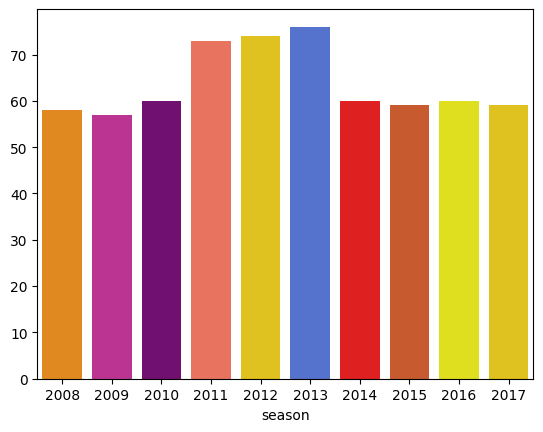

In [32]:
sns.barplot(x=match.groupby('season').size().keys(),y=match.groupby('season').size().values,palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'])


C:\Users\Prathik\AppData\Local\Temp\ipykernel_12884\1004615419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season',data=match,palette = ['darkorange','#d11d9b','purple',
C:\Users\Prathik\AppData\Local\Temp\ipykernel_12884\1004615419.py:1: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.countplot(x='season',data=match,palette = ['darkorange','#d11d9b','purple',


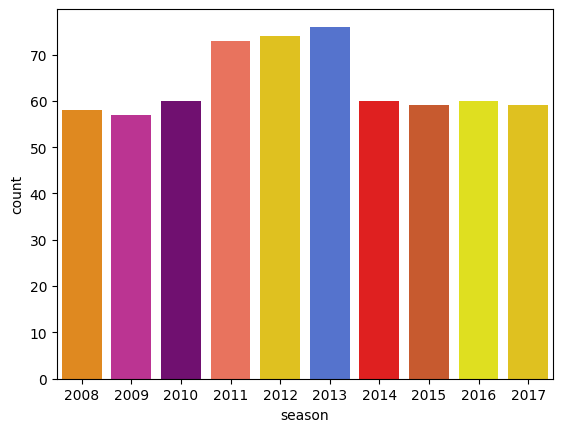

In [33]:
sns.countplot(x='season',data=match,palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'])
plt.show()

- Most number of winning team

In [26]:
match.groupby('winner').size()

winner
CSK     79
DC      29
DD      62
GL      13
KKR     77
KTK      6
KXIP    70
MI      92
PW      12
RCB     73
RPS     15
RR      63
SRH     42
dtype: int64

C:\Users\Prathik\AppData\Local\Temp\ipykernel_12884\2218003681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner',data=match,palette = ['darkorange','#d11d9b','purple',


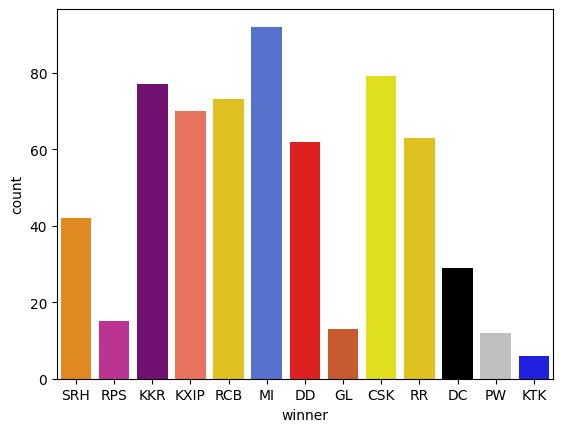

In [31]:
sns.countplot(x='winner',data=match,palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'])
plt.show()

- Is Toss Winner Also the Match Winner?


In [28]:
match.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [30]:
#Teams and number of times they won the toss and match
match[match['toss_winner']==match['winner']].groupby('winner').size()

winner
CSK     42
DC      19
DD      33
GL      10
KKR     44
KTK      4
KXIP    28
MI      48
PW       3
RCB     35
RPS      8
RR      34
SRH     17
dtype: int64

In [41]:
df=(match[match['toss_winner']==match['winner']])
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,GL,SRH,SRH,field,normal,0,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,630,2016,Kanpur,2016-05-21,MI,GL,GL,field,normal,0,GL,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan
631,632,2016,Raipur,2016-05-22,DD,RCB,RCB,field,normal,0,RCB,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,GL,RCB,RCB,field,normal,0,RCB,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
634,635,2016,Delhi,2016-05-27,GL,SRH,SRH,field,normal,0,SRH,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [35]:
len(match)

636

In [36]:
prob_toss_match=len(match[match['toss_winner']==match['winner']])/len(match)
prob_toss_match

0.5110062893081762

In [42]:
labels=['yes','no']
slices=[len(df),len(match)-len(df)]

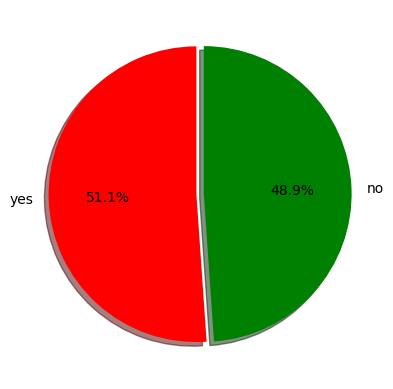

In [43]:
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
plt.show()

- Favorite Grounds 


In [45]:
match.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


<Axes: ylabel='venue'>

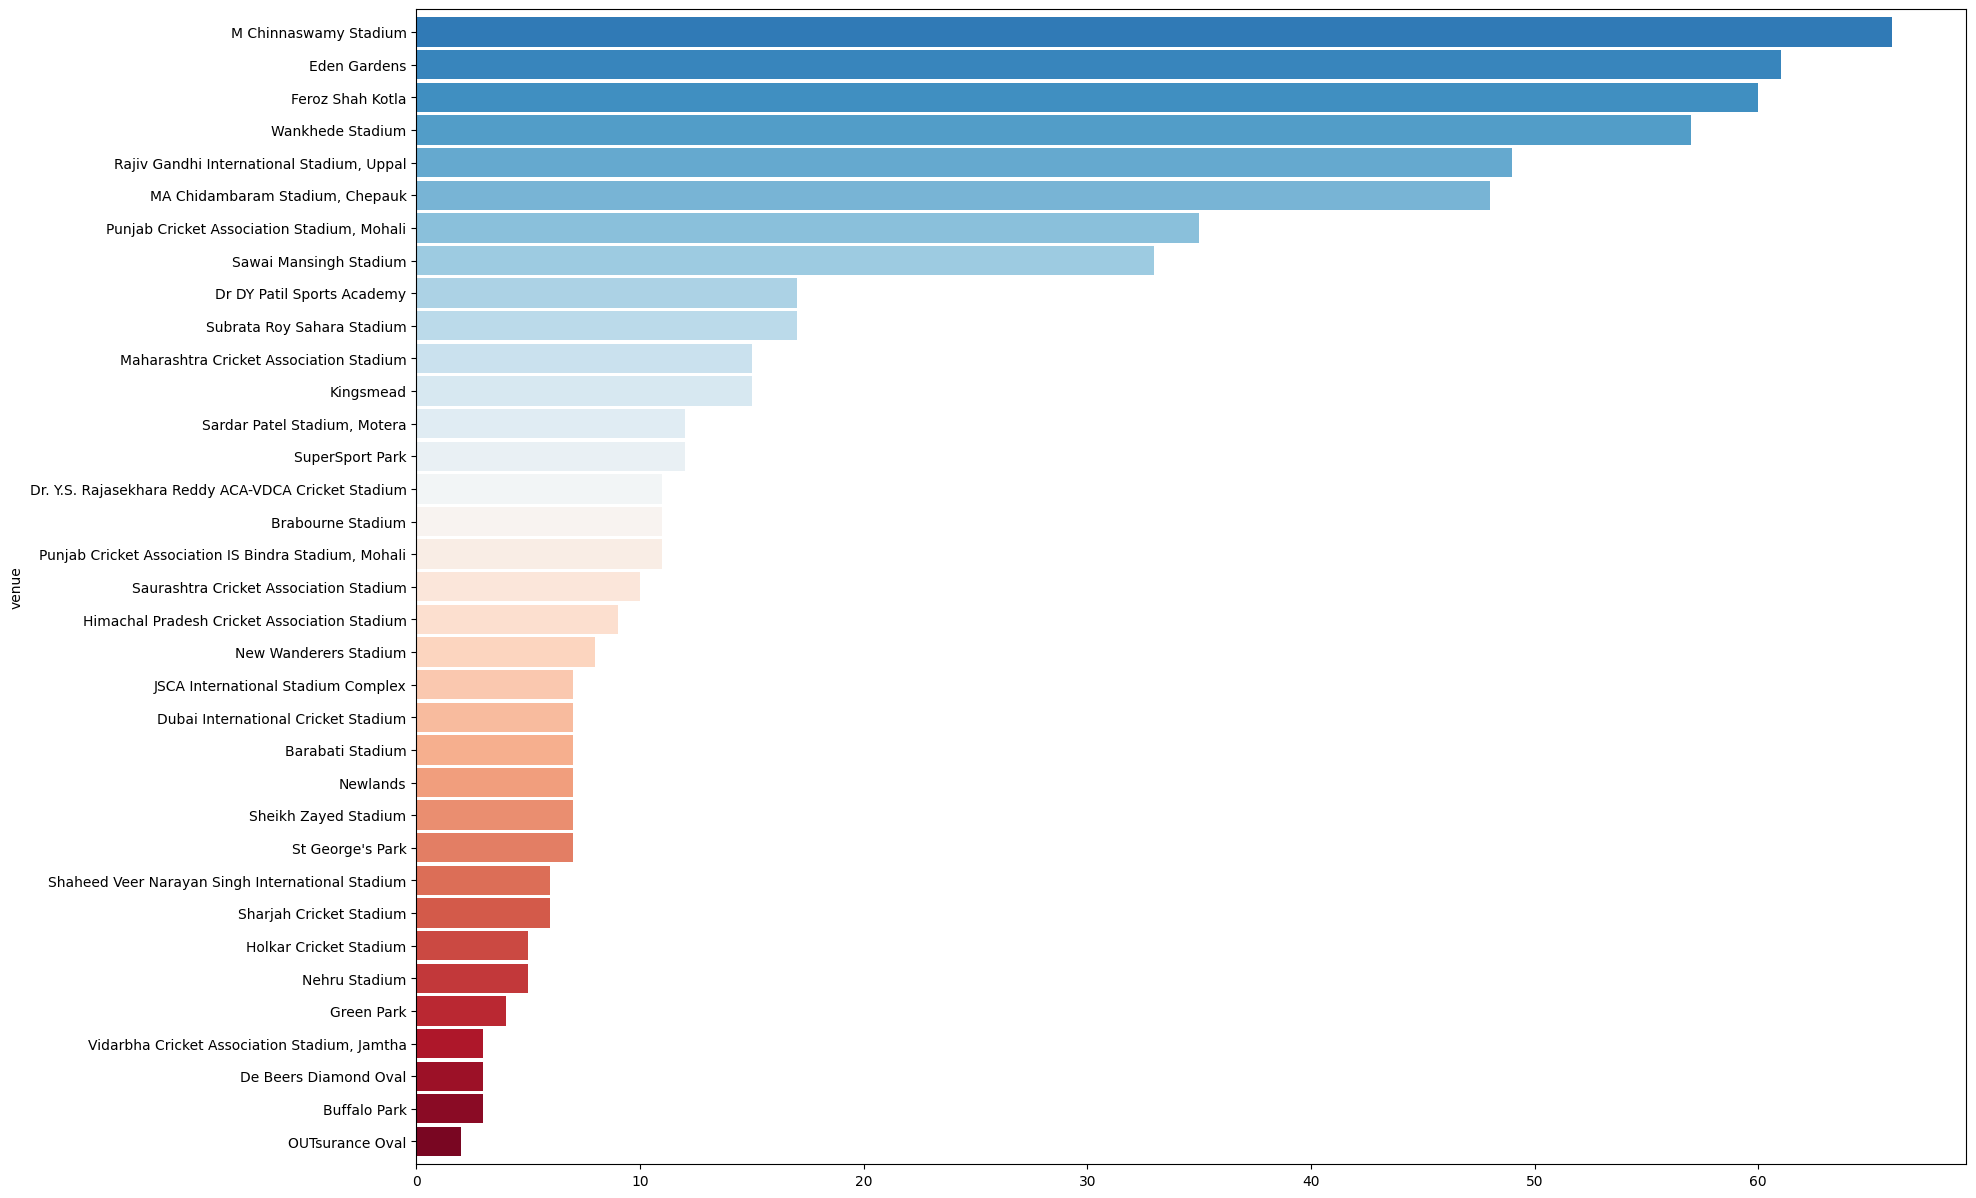

In [58]:
plt.figure(figsize=(20,15))
match.groupby('venue').size().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdBu',40))

- Top cities where the matches are held

<Axes: ylabel='city'>

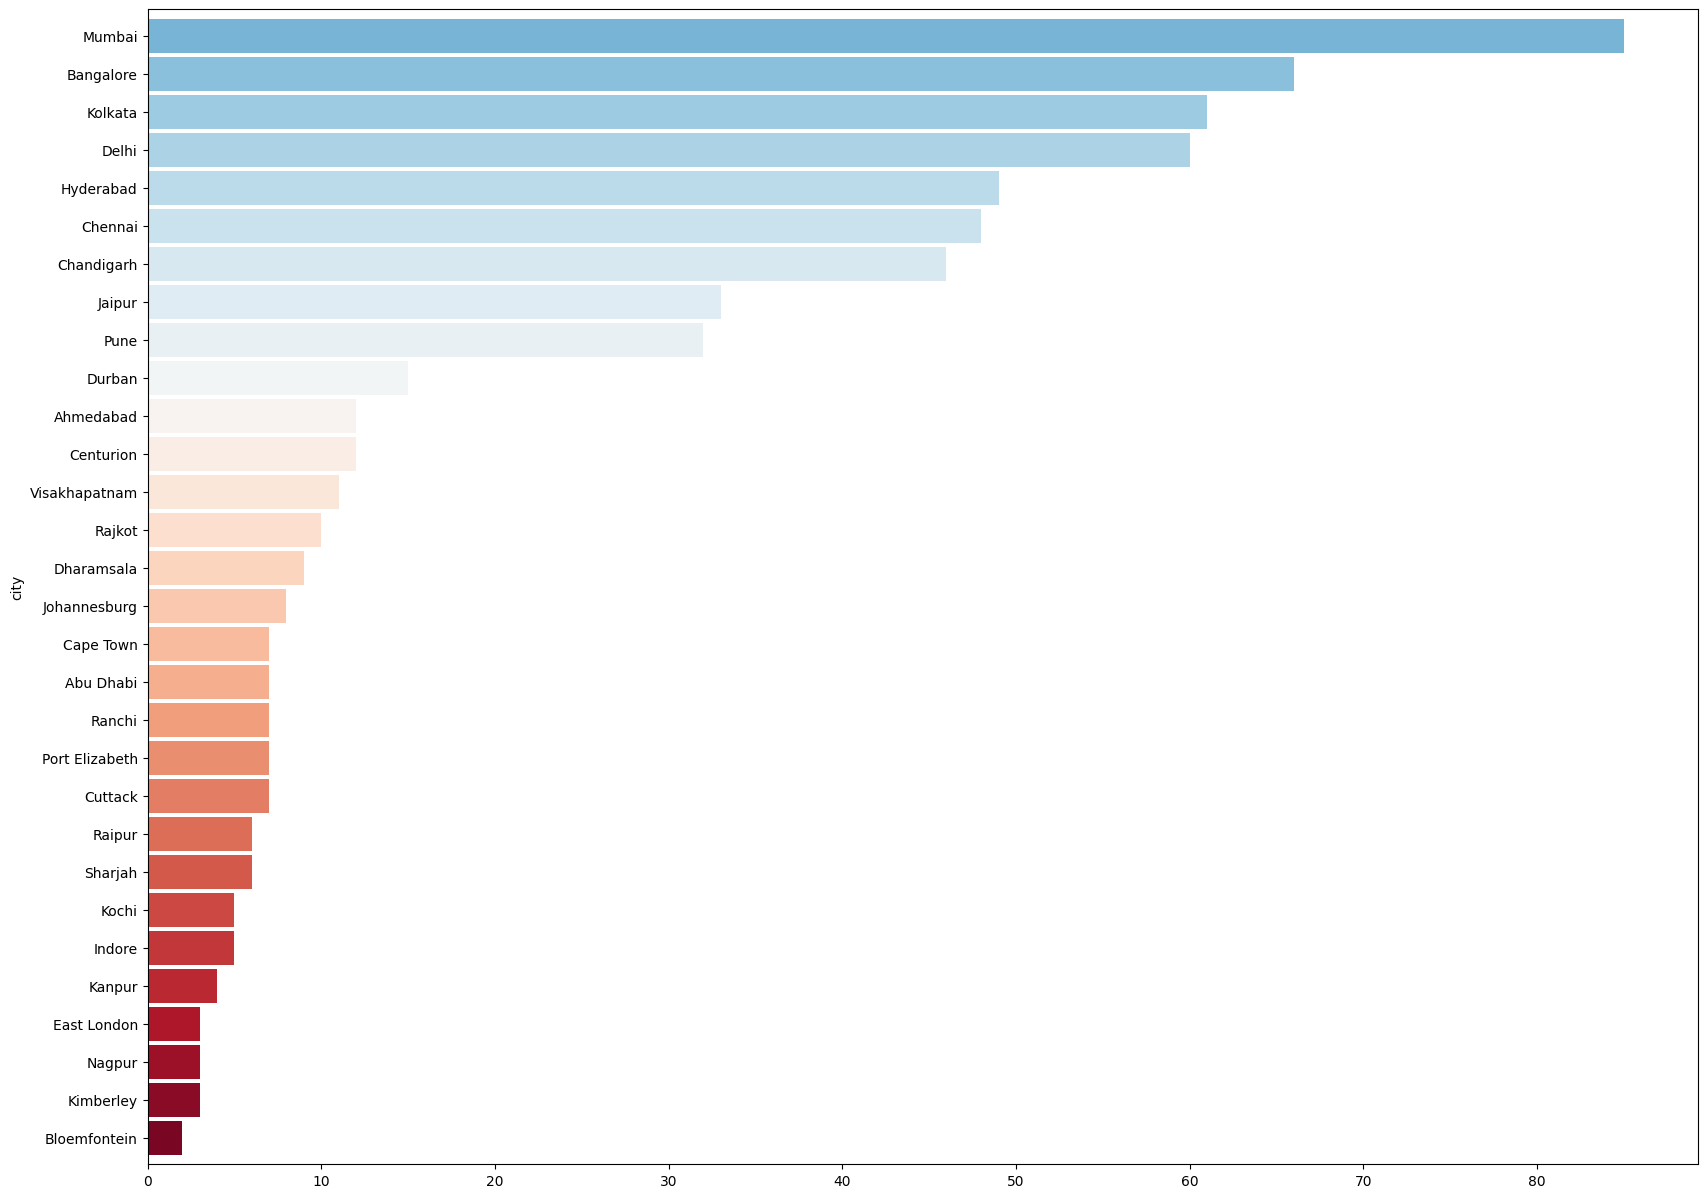

In [67]:
plt.figure(figsize=(20,15))
match['city'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdBu',40))

- Toss Decisions

In [72]:
match['toss_decision'].value_counts()

toss_decision
field    363
bat      273
Name: count, dtype: int64

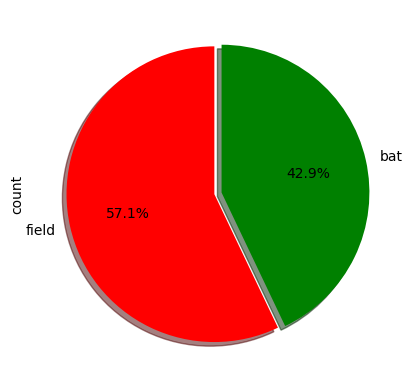

In [75]:
match['toss_decision'].value_counts().plot.pie(y=['field','bat'],startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
plt.show()

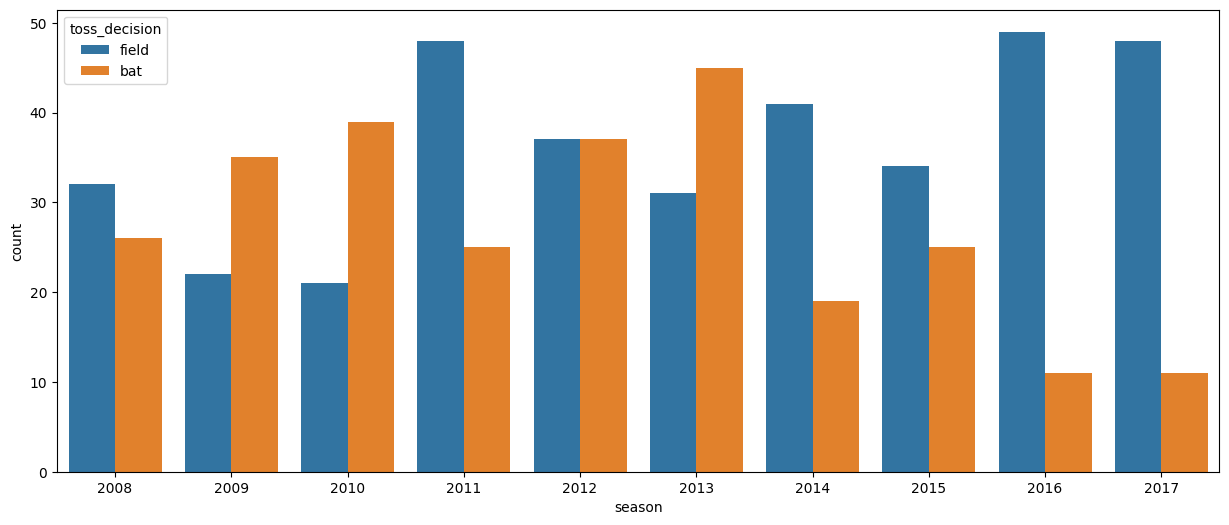

In [98]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'season', hue = 'toss_decision', data= match )
plt.show()

- Maximum Man Of Matches

In [76]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


<Axes: xlabel='toss_winner'>

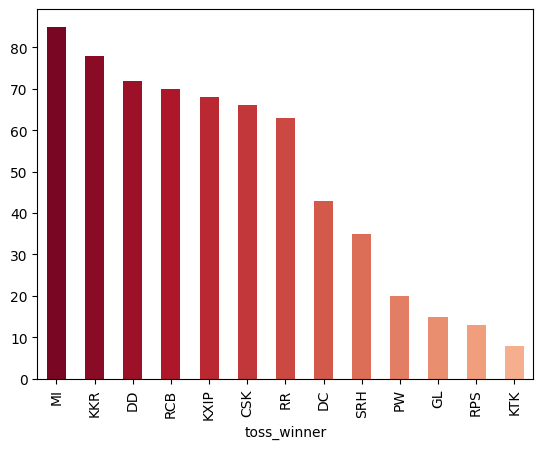

In [81]:
match['toss_winner'].value_counts().sort_values(ascending=False).plot.bar(color=sns.color_palette('RdBu',40))

- Winning Year

In [82]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [89]:
match[match['season']==2008].iloc[-1]['winner']#return winner of last match in 2008 (final)

'RR'

In [96]:

for i in range(2008, 2018):
    
    print(i,"->",match[match['season']==i].iloc[-1]['winner'])

2008 -> RR
2009 -> DC
2010 -> CSK
2011 -> CSK
2012 -> KKR
2013 -> MI
2014 -> KKR
2015 -> MI
2016 -> SRH
2017 -> MI
